In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


**Objective:
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**


Attribute Information:

age (numeric)

job : type of job (categorical: ‘admin.’,’bluecollar’,’entrepreneur’,’housemaid’,’management’,’retired’,’selfemployed’,’services’,’student’,’technician’,’unemployed’,’unknown’)

marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’;
note: ‘divorced’ means divorced or widowed)

education (categorical:
‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’univers
ity.degree’,’unknown’)

default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)

balance: average yearly balance, in euros (numeric)

housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)

loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)

contact: contact communication type (categorical: ‘cellular’,’telephone’)

day: last contact day of the month (numeric 1 -31)

month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet,
the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client 
was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical:
‘failure’,’nonexistent’,’success’)

target: has the client subscribed a term deposit? (binary: “yes”,”no”)

**Steps and tasks:
**
Import the necessary libraries. 
Read the data as a data frame. 
Perform basic EDA which should include the following and print out your insights at every step. 
The shape of the data .
The data type of each attribute.
Checking the presence of missing values .
Point summary of numerical attributes .
Checking the presence of outliers .
Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.
Train a few standard classification algorithms, note, and comment on their performances across different classification metrics. 
Build the ensemble models and compare the results with the base models. Note Random forest can be used only with Decision trees. 
Compare performances of all the models. 


In [2]:
data=pd.read_csv(r'E:\My_project_work\TDS\1_project\bank-full.csv')

In [3]:
data.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There is no missing value in the data

In [6]:
df=pd.DataFrame(data)

In [7]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

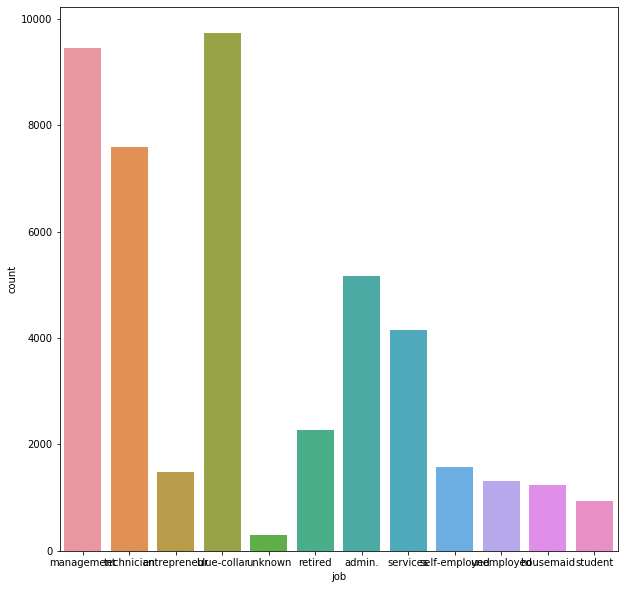

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(df.job)

In [9]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

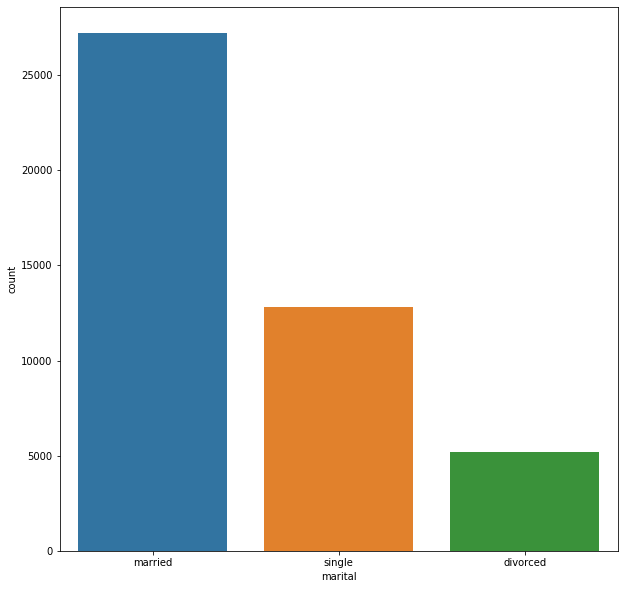

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(df.marital)

In [11]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

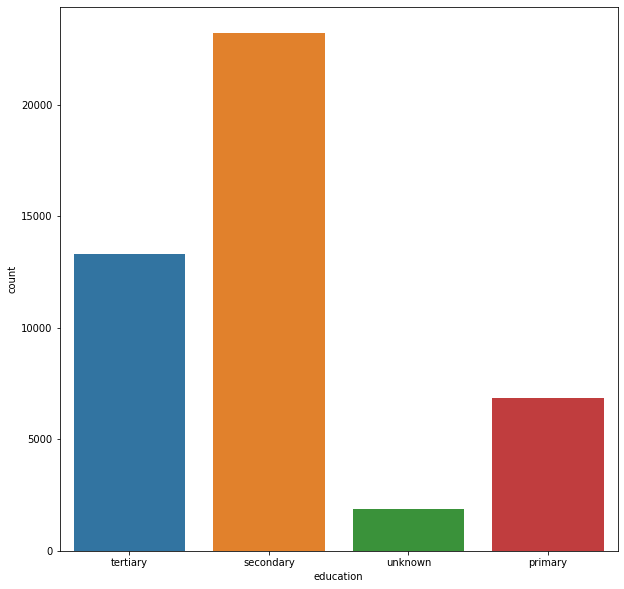

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(df.education)

In [13]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

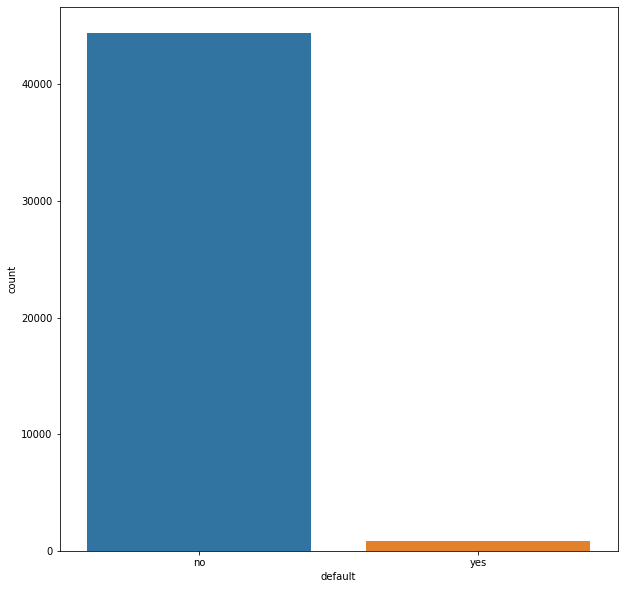

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(df.default)

In [15]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

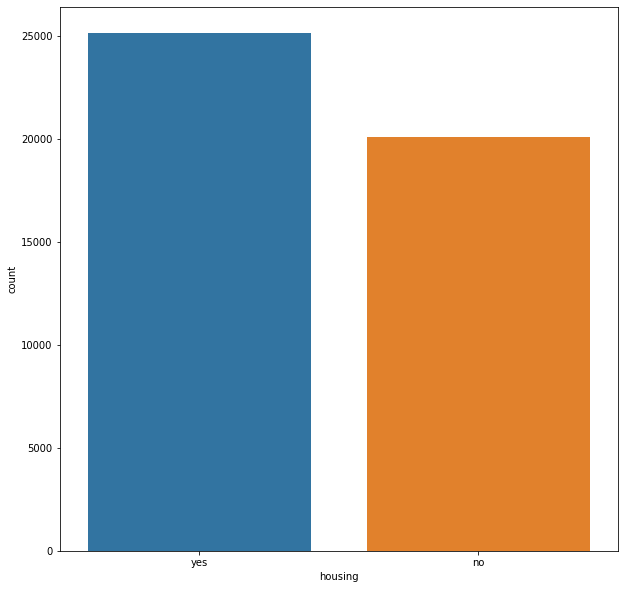

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(df.housing)

In [17]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

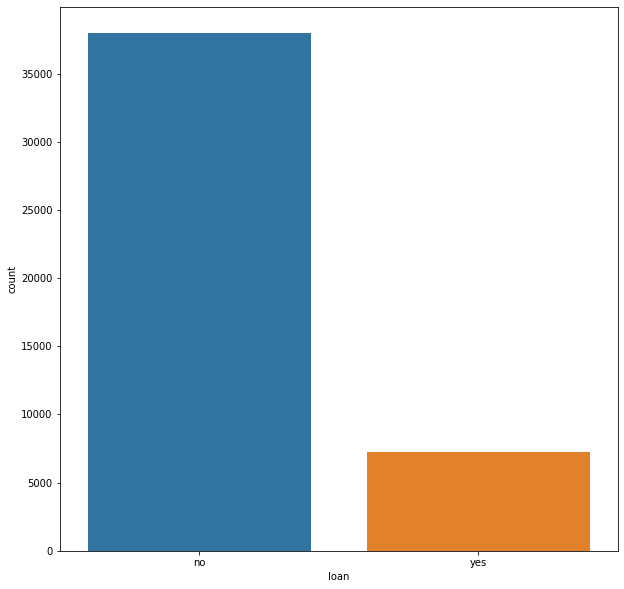

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(df.loan)

In [19]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

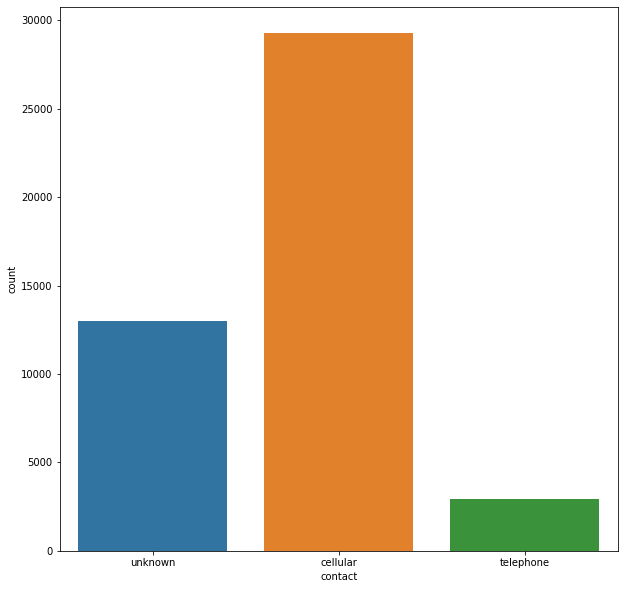

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(df.contact)

In [21]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

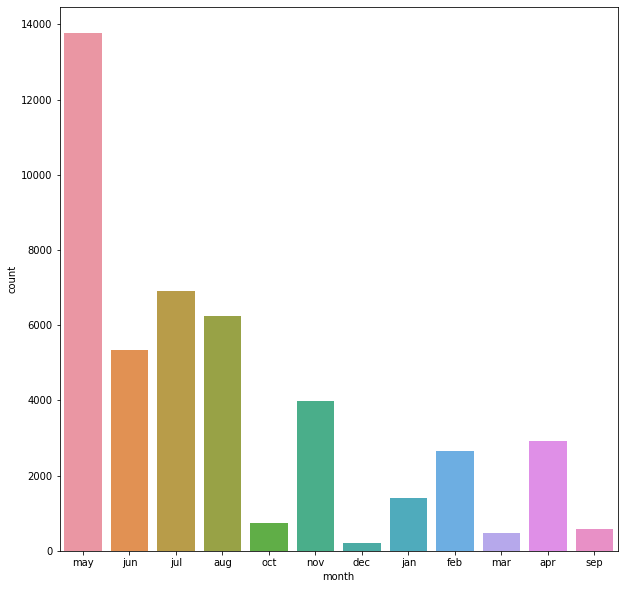

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(df.month)

In [23]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

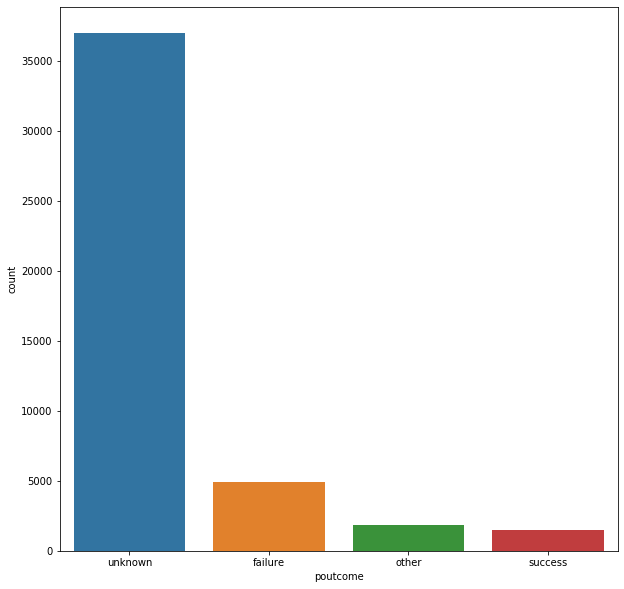

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(df.poutcome)

**Encoding the data**

In [25]:
from sklearn.preprocessing import LabelEncoder
df1=LabelEncoder()
df['job']=df1.fit_transform(df['job'])


In [26]:
df['education']=df1.fit_transform(df['education'])
df['marital']=df1.fit_transform(df['marital'])
df['default']=df1.fit_transform(df['default'])
df['housing']=df1.fit_transform(df['housing'])
df['loan']=df1.fit_transform(df['loan'])
df['contact']=df1.fit_transform(df['contact'])
df['month']=df1.fit_transform(df['month'])
df['poutcome']=df1.fit_transform(df['poutcome'])
df['Target']=df1.fit_transform(df['Target'])

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


**Distribution plot**

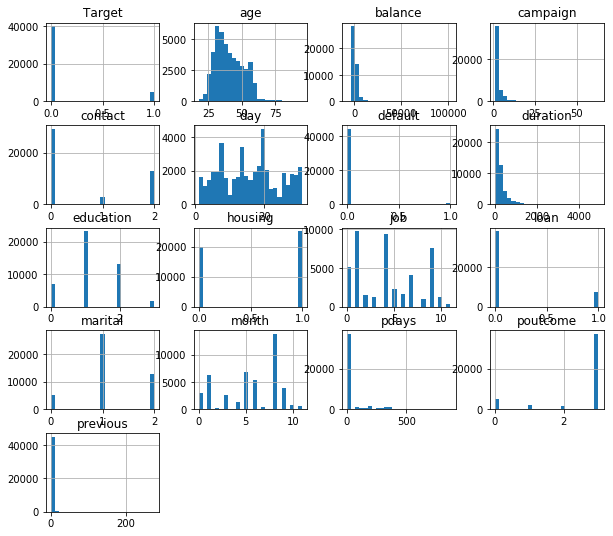

In [28]:
df.hist(bins=25,grid='False',figsize=(10,9));

In [29]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


**OUTLIEER** 

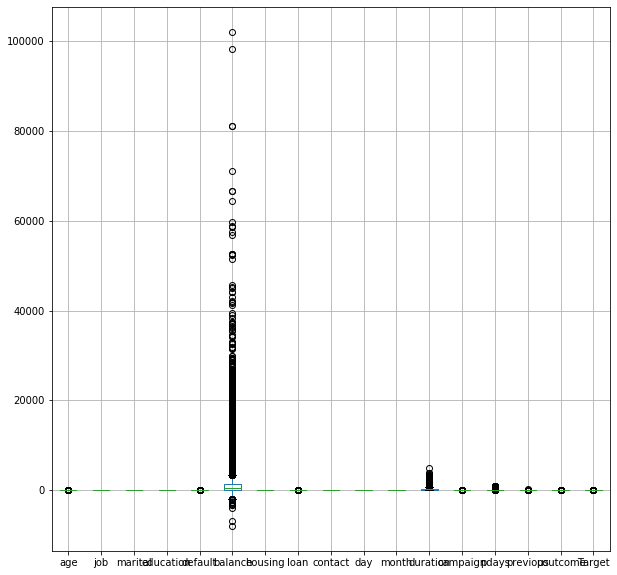

In [30]:
df.boxplot(figsize=(10,10))

take continuous variable to outlier analysis

In [ ]:
# dataframe of the  continuous variable of the data
df12=df[['age','balance','duration','campaign','pdays','poutcome']]

In [32]:
print('Number of outliers in age variable :',df12[((df12.age - df12.age.mean())/df12.age.std())>3]['age'].count())
print('Number of outliers in balance variable :',df12[((df12.balance - df12.balance.mean())/df12.balance.std())>3]['balance'].count())
print('Number of outliers in duration variable :',df12[((df12.duration - df12.duration.mean())/df12.duration.std())>3]['duration'].count())
print('Number of outliers in campaign variable :',df12[((df12.campaign - df12.campaign.mean())/df12.campaign.std())>3]['campaign'].count())
print('Number of outliers in pdays variable :',df12[((df12.pdays - df12.pdays.mean())/df12.pdays.std())>3]['pdays'].count())
print('Number of outliers in poutcome variable :',df12[((df12.poutcome - df12.poutcome.mean())/df12.poutcome.std())>3]['poutcome'].count())




Number of outliers in age variable : 381
Number of outliers in balance variable : 744
Number of outliers in duration variable : 963
Number of outliers in campaign variable : 840
Number of outliers in pdays variable : 1723
Number of outliers in poutcome variable : 0


In [33]:
for cols in df12.columns[:-1]:
    Q1 = df12[cols].quantile(0.25)
    Q3 = df12[cols].quantile(0.75)
    iqr = Q3 - Q1
    
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df12.loc[(df12[cols] < low) | (df12[cols] > high), cols] = df12[cols].median()

E:\python\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


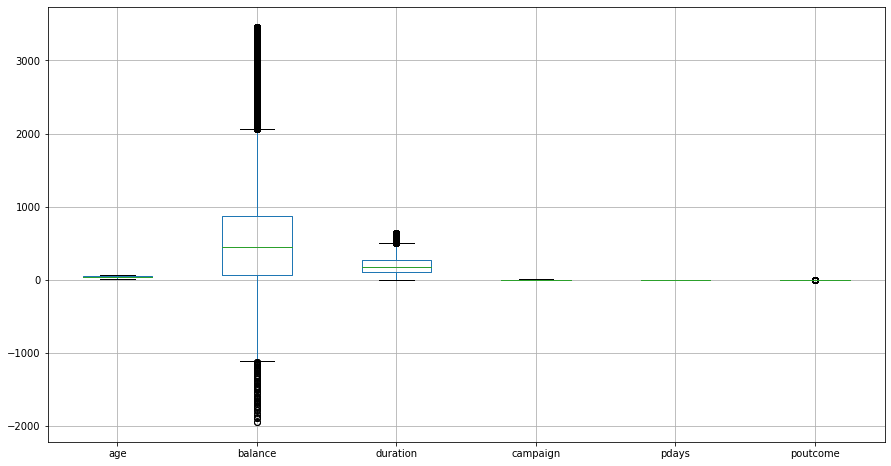

In [34]:
df12.boxplot(figsize=(15,8))

from above analysis we replace outliers by median of the comtinuous variable of the data

In [ ]:
# following data frame contains categorical variable of the data
df13=df[['job','marital','education','default','housing','loan','contact','day','month','previous','Target']]
df13.head()

**Standardize the df12** for continuous variable in the data

In [36]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit_transform(df12)

array([[ 1.76022325,  1.90025648,  0.43583694, -0.88218105,  0.        ,
         0.44489814],
       [ 0.34971726, -0.73823766, -0.37413326, -0.88218105,  0.        ,
         0.44489814],
       [-0.75853745, -0.7719365 , -0.92638567, -0.88218105,  0.        ,
         0.44489814],
       ...,
       [-0.15403488, -0.21528163, -0.16059567,  2.26525326,  0.        ,
        -0.56617504],
       [ 1.65947282,  0.05930149,  2.2545882 ,  1.47839468,  0.        ,
         0.44489814],
       [-0.35553574,  2.93368748,  1.17217348, -0.09532248,  0.        ,
        -1.57724822]])

In [37]:
df.shape

(45211, 17)

In [38]:
df_new=pd.concat([df12,df13],axis=1)

df_new

,age,balance,duration,campaign,pdays,poutcome,job,marital,education,default,housing,loan,contact,day,month,previous,Target
0,58.0,2143.0,261.0,1.0,-1.0,3,4,1,2,0,1,0,2,5,8,0,0
1,44.0,29.0,151.0,1.0,-1.0,3,9,2,1,0,1,0,2,5,8,0,0
2,33.0,2.0,76.0,1.0,-1.0,3,2,1,1,0,1,1,2,5,8,0,0
3,47.0,1506.0,92.0,1.0,-1.0,3,1,1,3,0,1,0,2,5,8,0,0
4,33.0,1.0,198.0,1.0,-1.0,3,11,2,3,0,0,0,2,5,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825.0,180.0,3.0,-1.0,3,9,1,2,0,0,0,0,17,9,0,1
45207,39.0,1729.0,456.0,2.0,-1.0,3,5,0,0,0,0,0,0,17,9,0,1
45208,39.0,448.0,180.0,5.0,-1.0,2,5,1,1,0,0,0,0,17,9,3,1
45209,57.0,668.0,508.0,4.0,-1.0,3,1,1,1,0,0,0,1,17,9,0,0


**Feature Engineering and Model Building**

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
x=df_new.drop(['Target'],axis=1)
y=df_new['Target']

In [41]:
# split data in trian and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
 from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred1=model1.predict(x_test)

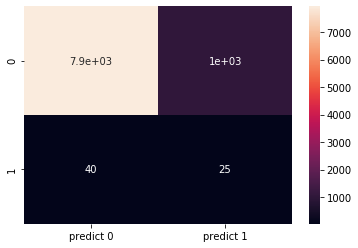

In [45]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_pred1,y_test)
df_cm1=pd.DataFrame(cm1,index=[i for i in[0,1]],columns=[i for i in ['predict 0','predict 1']])
sns.heatmap(df_cm1,annot=True)

In [46]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_pred1,y_test)
print('Accuracy of the model : ',ac1)  

Accuracy of the model :  0.8807917726418224


In [47]:
# cross validation of logistic regression
LR_accu=cross_val_score(estimator=model1,cv=10,X=x_train,y=y_train)
print('Accuracies of the model :',LR_accu)
print('Mean of Accuracy :',LR_accu.mean())

Accuracies of the model : [0.88222284 0.88443461 0.88249931 0.88001106 0.88526403 0.88166989
 0.88001106 0.88222284 0.88053097 0.88219027]
Mean of Accuracy : 0.8821056876206509


In [48]:
#store the accuracies in the data frame
result1=pd.DataFrame({'Model': ['LogisticRegression','LR_CROSS_VAL'],'Accuracy':[ac1,LR_accu.mean()]},index={'1','2'})
result=result1[['Model','Accuracy']]
result

,Model,Accuracy
1,LogisticRegression,0.880792
2,LR_CROSS_VAL,0.882106


**Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
y_pred2=model2.predict(x_test)

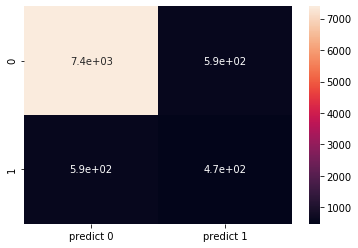

In [51]:
cm2=confusion_matrix(y_pred2,y_test)
df_cm2=pd.DataFrame(cm2,index=[i for i in [0,1]],columns=[i for i in ['predict 0','predict 1']])
sns.heatmap(df_cm2,annot=True)

In [52]:
ac2=accuracy_score(y_pred2,y_test)
print('Accuracy of the DE :',ac2)

Accuracy of the DE : 0.8695123299789893


In [53]:
#cross validation of the Decision tree
DE_accu=cross_val_score(estimator=model2,X=x_train,y=y_train,cv=10)
print('Accuracies of DE :',DE_accu)
print('Mean of the Accuracies :',DE_accu.mean())

Accuracies of DE : [0.87116395 0.87586398 0.86508156 0.86922864 0.87199336 0.87337573
 0.86978159 0.88249931 0.87721239 0.86061947]
Mean of the Accuracies : 0.8716819970101854


In [54]:
#store the accuracies in the data frame
result2=pd.DataFrame({'Model': ['DecisionTree','DE_cross_val'],'Accuracy':[ac2,DE_accu.mean()]},index={'4','3'})
result=pd.concat([result1,result2])
result=result[['Model','Accuracy']]
result

,Model,Accuracy
1,LogisticRegression,0.880792
2,LR_CROSS_VAL,0.882106
4,DecisionTree,0.869512
3,DE_cross_val,0.871682


**RandomForest**

In [55]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_pred3=model3.predict(x_test)

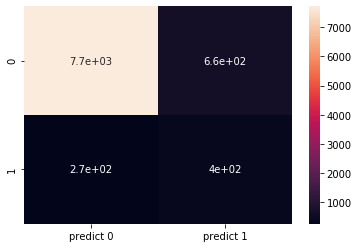

In [57]:
cm3=confusion_matrix(y_pred3,y_test)
df_cm3=pd.DataFrame(cm3,index=[i for i in [0,1]],columns=[i for i in ['predict 0','predict 1']])
sns.heatmap(df_cm3,annot=True)

In [58]:
ac3=accuracy_score(y_pred3,y_test)
print('Accuracy of Random Forest :',ac3)

Accuracy of Random Forest : 0.8967156916952339


In [59]:
#cross validation of the RandomForest model
RF_accu=cross_val_score(estimator=model3,X=x_train,y=y_train,cv=10)
print('Accuracies of RF :',RF_accu)
print('Mean of the RF_ACCU :',RF_accu.mean())

Accuracies of RF : [0.89991706 0.90157589 0.89659939 0.89742881 0.90129942 0.9035112
 0.90489356 0.89964059 0.91012168 0.89878319]
Mean of the RF_ACCU : 0.9013770778232585


In [60]:

#store the accuracies in the data frame
result3=pd.DataFrame({'Model': ['RandomForest','RF_cross_val'],'Accuracy':[ac3,RF_accu.mean()]},index={'6','5'})
result=pd.concat([result1,result2,result3])
result=result[['Model','Accuracy']]
result


,Model,Accuracy
1,LogisticRegression,0.880792
2,LR_CROSS_VAL,0.882106
4,DecisionTree,0.869512
3,DE_cross_val,0.871682
5,RandomForest,0.896716
6,RF_cross_val,0.901377


**Gradient Boosting**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier()
model4.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
y_pred4=model4.predict(x_test)

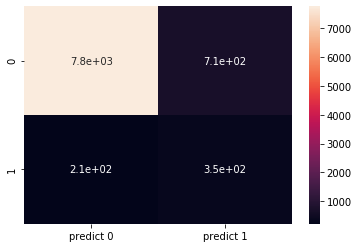

In [63]:
cm4=confusion_matrix(y_pred4,y_test)
df_cm4=pd.DataFrame(cm4,index=[i for i in [0,1]],columns=[i for i in ['predict 0','predict 1']])
sns.heatmap(df_cm4,annot=True)

In [64]:
y_train.shape

(36168,)

In [65]:
ac4=accuracy_score(y_pred4,y_test)
print('Accuracy of the model Gradient Boost : ',ac4)

Accuracy of the model Gradient Boost :  0.8980426849496849


In [66]:
#cross validation of the RandomForest model
GDB_accu=cross_val_score(estimator=model4,X=x_train,y=y_train,cv=10)
print('Accuracies of Gradient_Boosting :',GDB_accu)
print('Mean of the GDB_accu :',GDB_accu.mean())

Accuracies of Gradient_Boosting : [0.90157589 0.89908764 0.90157589 0.89825823 0.89881117 0.90268178
 0.90240531 0.90434061 0.90625    0.9056969 ]
Mean of the GDB_accu : 0.9020683424634408


In [67]:
#store the accuracies in the data frame
result4=pd.DataFrame({'Model': ['GradientBoosting','GDB_Accu'],'Accuracy':[ac4,GDB_accu.mean()]},index={'8','7'})
result=pd.concat([result1,result2,result3,result4])
result=result[['Model','Accuracy']]
result


,Model,Accuracy
1,LogisticRegression,0.880792
2,LR_CROSS_VAL,0.882106
4,DecisionTree,0.869512
3,DE_cross_val,0.871682
5,RandomForest,0.896716
6,RF_cross_val,0.901377
7,GradientBoosting,0.898043
8,GDB_Accu,0.902068


**AdapBoosting classifier**

In [68]:
from sklearn.ensemble import AdaBoostClassifier
model5=AdaBoostClassifier()
model5.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [69]:
y_pred5=model5.predict(x_test)

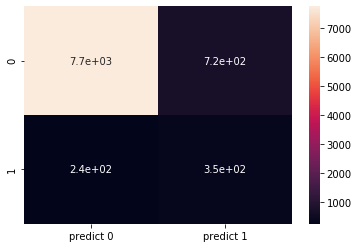

In [70]:
cm5=confusion_matrix(y_pred5,y_test)
df_cm5=pd.DataFrame(cm5,index=[i for i in [0,1]],columns=[i for i in ['predict 0','predict 1']])
sns.heatmap(df_cm5,annot=True)

In [71]:
ac5=accuracy_score(y_pred5,y_test)
print('Accuracy of the AdaBoosting :',ac5)

Accuracy of the AdaBoosting : 0.8945040362711489


In [72]:
#cross validation of the RandomForest model
Ada_accu=cross_val_score(estimator=model5,X=x_train,y=y_train,cv=10)
print('Accuracies of Ada_Boosting :',Ada_accu)
print('Mean of the Ada_accu :',Ada_accu.mean())

Accuracies of Ada_Boosting : [0.89576998 0.89632292 0.90019353 0.89217584 0.8954935  0.89825823
 0.89632292 0.90074647 0.90127212 0.89574115]
Mean of the Ada_accu : 0.8972296658356189


In [73]:
#store the accuracies in the data frame
result5=pd.DataFrame({'Model': ['AdaBoosting','Ada_cross_val'],'Accuracy':[ac5,Ada_accu.mean()]},index={'10','9'})
result=pd.concat([result1,result2,result3,result4,result5])
result=result[['Model','Accuracy']]
result


,Model,Accuracy
1,LogisticRegression,0.880792
2,LR_CROSS_VAL,0.882106
4,DecisionTree,0.869512
3,DE_cross_val,0.871682
5,RandomForest,0.896716
6,RF_cross_val,0.901377
7,GradientBoosting,0.898043
8,GDB_Accu,0.902068
10,AdaBoosting,0.894504
9,Ada_cross_val,0.897230


**Bagging**

In [74]:
from sklearn.ensemble import BaggingClassifier
model6=BaggingClassifier()
model6.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [75]:
y_pred6=model6.predict(x_test)

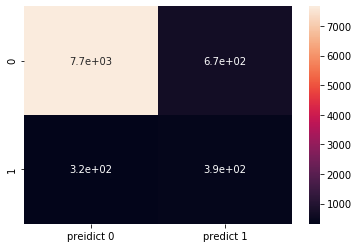

In [76]:
cm6=confusion_matrix(y_pred6,y_test)
df_cm6=pd.DataFrame(cm6,index=[i for i in [0,1]],columns=[i for i in ['preidict 0','predict 1']])
sns.heatmap(df_cm6,annot=True)

In [77]:
ac6=accuracy_score(y_pred6,y_test)
print('Accuracy of the Bagging :',ac6)

Accuracy of the Bagging : 0.8906336392790003


In [78]:
#cross validation of the RandomForest model
Bagging_accu=cross_val_score(estimator=model6,X=x_train,y=y_train,cv=10)
print('Accuracies of Bagging :',Bagging_accu)
print('Mean of the Bagging_accu :',Bagging_accu.mean())

Accuracies of Bagging : [0.8985347  0.89964059 0.89604645 0.89217584 0.89604645 0.89687586
 0.89272878 0.90682886 0.90320796 0.89325221]
Mean of the Bagging_accu : 0.8975337699800108


In [79]:
#store the accuracies in the data frame
result6=pd.DataFrame({'Model': ['Bagging','Bagging_cross_val'],'Accuracy':[ac6,Bagging_accu.mean()]},index={'12','11'})
result=pd.concat([result1,result2,result3,result4,result5,result6])
result=result[['Model','Accuracy']]
result




,Model,Accuracy
1,LogisticRegression,0.880792
2,LR_CROSS_VAL,0.882106
4,DecisionTree,0.869512
3,DE_cross_val,0.871682
5,RandomForest,0.896716
6,RF_cross_val,0.901377
7,GradientBoosting,0.898043
8,GDB_Accu,0.902068
10,AdaBoosting,0.894504
9,Ada_cross_val,0.897230


It can be seen that from above all algorithm k-fold cross validation of the Random Forest and Gradiendient Boosting shows higher accuracy than the other algorithm we used.
Ensemble algorithm shows high accuracy than other algorithm

We verify accuracy by using confusion matrix and acuuracy score.

Cross validation of the GradientBoosting is high accuracy i.e. 90.20%